In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# import numpy as np

In [4]:
product_info_file_path = '../data/product_info.csv'
data = pd.read_csv(product_info_file_path)
data_info = data.info()
data_head = data.head()

# data_info, data_head
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [13]:
product_info_df = data.copy()
# product_info_df.drop(['size', 'variation_type', 'variation_value','variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count','child_max_price', 'child_min_price'], axis=1, inplace=True)
# product_info_df.rename(columns={'rating': 'overall_rating'}, inplace=True)

# 1. Handle Missing Values
# For numerical columns (e.g., 'rating', 'reviews'), impute with median
numerical_cols = product_info_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
num_imputer = SimpleImputer(strategy='median')
product_info_df[numerical_cols] = num_imputer.fit_transform(product_info_df[numerical_cols])

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')


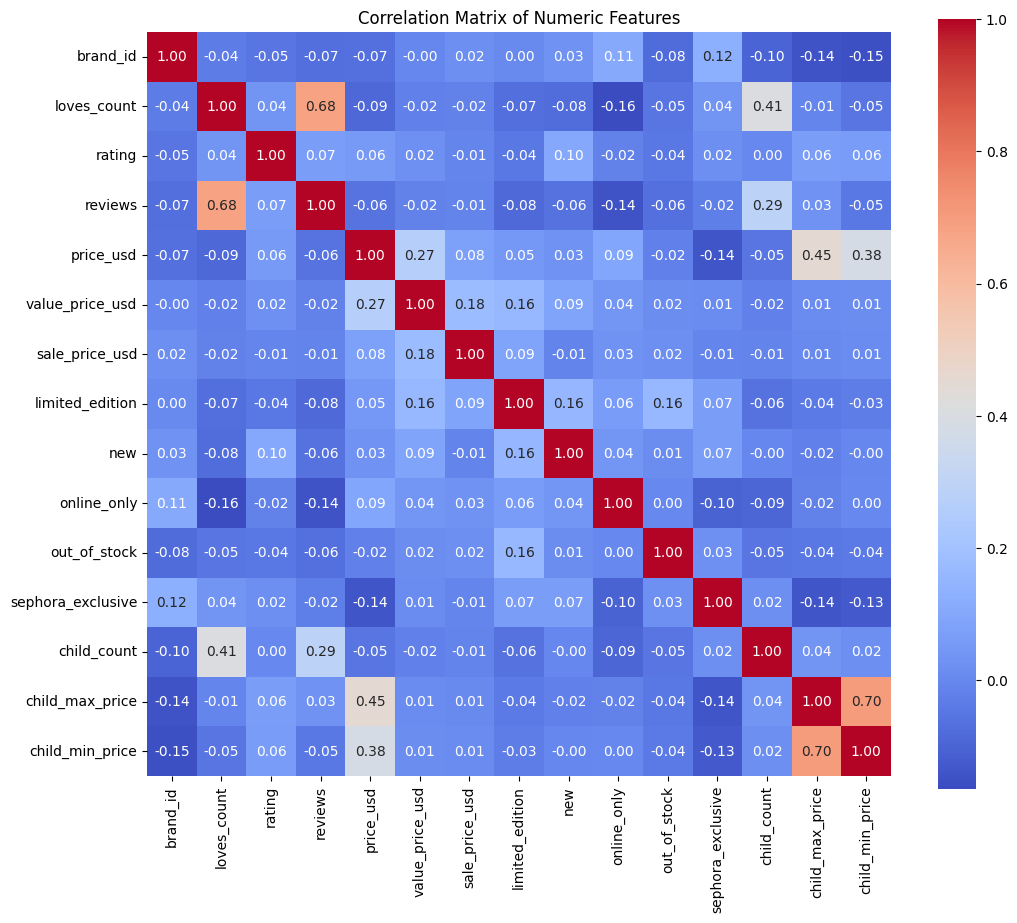

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
brand_id,1.000000,-0.035604,-0.051293,-0.069542,-0.066667,-0.002451,0.020799,0.004533,0.027141,0.107290,-0.081976,0.124417,-0.096247,-0.144147,-0.152427
loves_count,-0.035604,1.000000,0.039019,0.684898,-0.089607,-0.022430,-0.015578,-0.069116,-0.076058,-0.163905,-0.053776,0.040512,0.408203,-0.005166,-0.050613
rating,-0.051293,0.039019,1.000000,0.067886,0.056934,0.024575,-0.005044,-0.041245,0.100531,-0.017164,-0.043984,0.017957,0.002353,0.063580,0.062883
reviews,-0.069542,0.684898,0.067886,1.000000,-0.056365,-0.017087,-0.010817,-0.084927,-0.063454,-0.143275,-0.064459,-0.024396,0.288169,0.032294,-0.045112
price_usd,-0.066667,-0.089607,0.056934,-0.056365,1.000000,0.267661,0.075446,0.046343,0.028793,0.091808,-0.022198,-0.140527,-0.051893,0.450561,0.383512
value_price_usd,-0.002451,-0.022430,0.024575,-0.017087,0.267661,1.000000,0.176163,0.161522,0.090517,0.043334,0.015145,0.012408,-0.020598,0.009750,0.013919
sale_price_usd,0.020799,-0.015578,-0.005044,-0.010817,0.075446,0.176163,1.000000,0.086500,-0.012285,0.028220,0.021127,-0.009158,-0.011614,0.008064,0.008866
limited_edition,0.004533,-0.069116,-0.041245,-0.084927,0.046343,0.161522,0.086500,1.000000,0.155662,0.061462,0.162170,0.066938,-0.062251,-0.038063,-0.031249
new,0.027141,-0.076058,0.100531,-0.063454,0.028793,0.090517,-0.012285,0.155662,1.000000,0.042553,0.014177,0.066984,-0.003873,-0.018866,-0.002845
online_only,0.107290,-0.163905,-0.017164,-0.143275,0.091808,0.043334,0.028220,0.061462,0.042553,1.000000,0.002011,-0.100806,-0.091615,-0.016516,0.003690


In [15]:
correlation_matrix = product_info_df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

correlation_matrix

In [16]:
# For categorical columns (e.g., 'size', 'variation_type'), impute with most frequent
categorical_cols = ['primary_category', 'secondary_category', 'tertiary_category', 'size', 'variation_type', 'variation_value','variation_desc']
cat_imputer = SimpleImputer(strategy='most_frequent')
product_info_df[categorical_cols] = cat_imputer.fit_transform(product_info_df[categorical_cols])

In [ ]:
# Encoding binary categorical columns
binary_cols = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']
product_info_df[binary_cols] = product_info_df[binary_cols].astype(int)

In [6]:
# Encoding specific categorical columns with Label Encoding
label_encoder_cols = ['brand_name', 'primary_category', 'secondary_category', 'tertiary_category']
label_encoders = {col: LabelEncoder() for col in label_encoder_cols}
for col in label_encoder_cols:
    product_info_df[col] = label_encoders[col].fit_transform(product_info_df[col].astype(str))

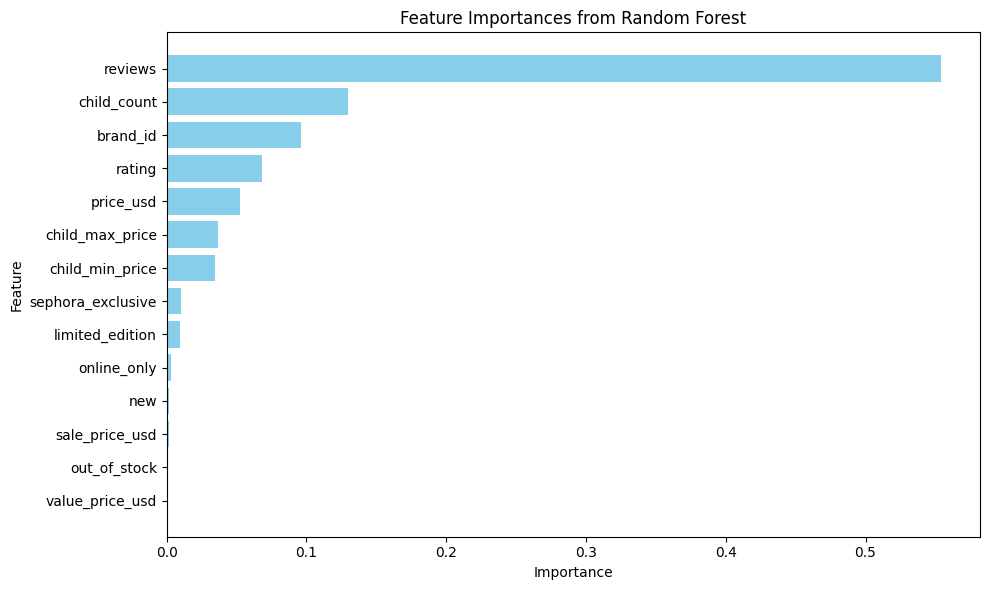

In [ ]:
# Selecting numeric features (excluding the target 'rating')
target_variable = 'loves_count'
features = numerical_cols.drop(target_variable)
X = product_info_df[features]
y = product_info_df[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance table using matplotlib for visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()



In [8]:
# Standardizing numerical features
scaler = StandardScaler()
product_info_df[numerical_cols] = scaler.fit_transform(product_info_df[numerical_cols])

In [ ]:
# Text Processing: TF-IDF Vectorization for 'highlights' and 'ingredients'
product_info_df['highlights'] = product_info_df['highlights'].fillna('')
product_info_df['ingredients'] = product_info_df['ingredients'].fillna('')

# TF-IDF Vectorization with max 50 features to simplify analysis
tfidf_highlights = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_ingredients = TfidfVectorizer(max_features=50, stop_words='english')

# Fit and transform for each column
highlights_tfidf_matrix = tfidf_highlights.fit_transform(product_info_df['highlights'])
ingredients_tfidf_matrix = tfidf_ingredients.fit_transform(product_info_df['ingredients'])

# Convert TF-IDF matrices to DataFrames
highlights_df = pd.DataFrame(highlights_tfidf_matrix.toarray(), columns=tfidf_highlights.get_feature_names_out())
ingredients_df = pd.DataFrame(ingredients_tfidf_matrix.toarray(), columns=tfidf_ingredients.get_feature_names_out())


In [ ]:

# Merge TF-IDF features into processed data
product_info_df.drop(['highlights', 'ingredients'], axis=1, inplace=True)
processed_data = pd.concat([product_info_df.reset_index(drop=True), highlights_df, ingredients_df], axis=1)

# Display a sample of the processed data
processed_data_sample = processed_data.head()
processed_data_sample


,product_id,product_name,brand_id,brand_name,loves_count,overall_rating,reviews,price_usd,primary_category,secondary_category,...,potassium,red,root,seed,silica,sodium,stearate,titanium,tocopherol,water
0,P473671,Fragrance Discovery Set,6342,0,6320,-1.103850,-0.393313,-0.310356,1,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,P473668,La Habana Eau de Parfum,6342,0,3827,-0.086183,-0.391470,2.671043,1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,P473662,Rainbow Bar Eau de Parfum,6342,0,3253,0.103032,-0.388706,2.671043,1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P473660,Kasbah Eau de Parfum,6342,0,3018,0.547941,-0.384098,2.671043,1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P473658,Purple Haze Eau de Parfum,6342,0,2691,-1.901619,-0.391470,2.671043,1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
